In [31]:
import pandas as pd
data = pd.read_csv("/Users/emily/Desktop/A_Z Handwritten Data.csv")

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

print(data.head())

X = data.drop('0', axis = 1)
y = data['0']



   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [32]:
import torchvision.transforms as transforms
import torch

In [33]:
alphabet_counter = np.zeros(26, dtype='int')
alphabet_counter

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [34]:
y_int = np.int0(y)

In [35]:
y_int = np.int0(y)
for i in y_int:
    alphabet_counter[i] += 1
alphabet_counter


array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [77]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [37]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [38]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

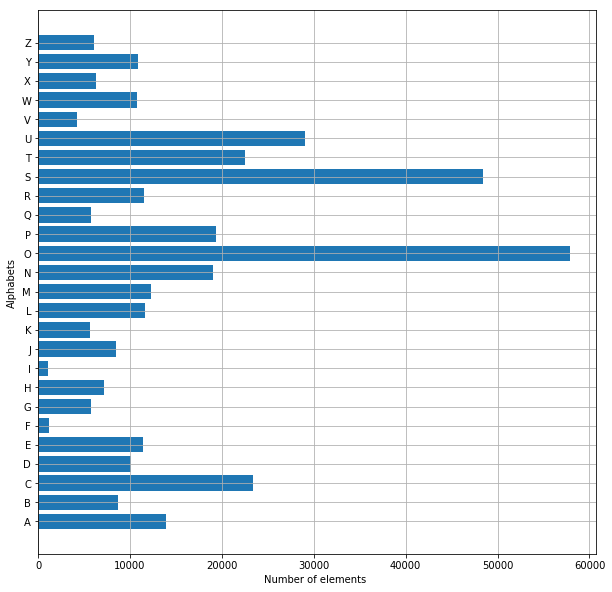

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, alphabet_counter)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

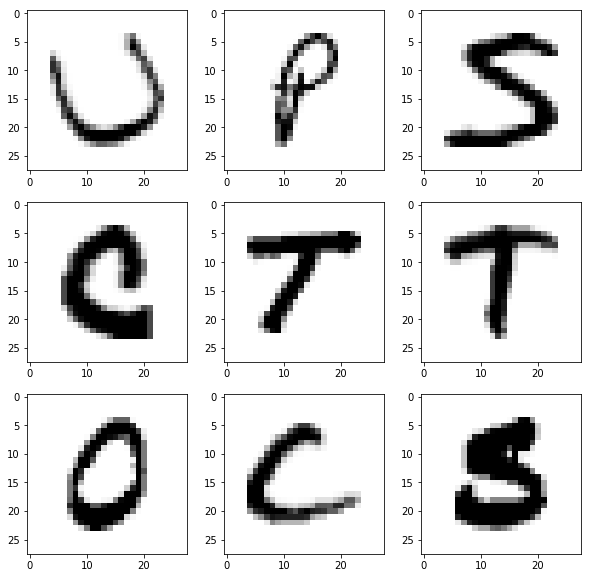

In [40]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
   # _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(train_x[i], (28,28)), cmap="Greys")
plt.show()

In [41]:
torch_train_x = []
for i in range(len(train_x)):
    torch_train_x.append(torch.from_numpy(train_x[i]))

In [42]:
#print(torch_train_x[:10])
d = {}
for i in range(256):
    d[str(i)]=0
for e in train_x[:20]:
    for ee in e:
        #ca = np.bincount(ee)
        for i in range(255):
            d[str(i)]+=ee.tolist().count(i)

In [43]:
print(d)
#d.pop('0')
plt.bar(d.keys(),d.values(),2)
plt.xlabel("Grayscale Values 1-255")
plt.ylabel("Count")
plt.show()

{'0': 12045, '1': 18, '2': 13, '3': 10, '4': 23, '5': 12, '6': 16, '7': 21, '8': 21, '9': 13, '10': 9, '11': 22, '12': 15, '13': 13, '14': 9, '15': 12, '16': 11, '17': 14, '18': 13, '19': 6, '20': 11, '21': 9, '22': 15, '23': 11, '24': 4, '25': 9, '26': 13, '27': 17, '28': 9, '29': 9, '30': 14, '31': 15, '32': 9, '33': 8, '34': 6, '35': 8, '36': 14, '37': 4, '38': 8, '39': 11, '40': 13, '41': 10, '42': 10, '43': 11, '44': 4, '45': 8, '46': 7, '47': 6, '48': 8, '49': 5, '50': 9, '51': 5, '52': 10, '53': 9, '54': 8, '55': 8, '56': 6, '57': 10, '58': 2, '59': 2, '60': 7, '61': 10, '62': 13, '63': 2, '64': 10, '65': 7, '66': 10, '67': 4, '68': 19, '69': 5, '70': 9, '71': 9, '72': 7, '73': 8, '74': 3, '75': 10, '76': 3, '77': 10, '78': 10, '79': 8, '80': 7, '81': 9, '82': 6, '83': 4, '84': 2, '85': 13, '86': 3, '87': 9, '88': 12, '89': 8, '90': 5, '91': 12, '92': 9, '93': 5, '94': 9, '95': 5, '96': 12, '97': 4, '98': 2, '99': 5, '100': 7, '101': 7, '102': 11, '103': 2, '104': 6, '105': 7, '

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/emily/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-3dd104ae4d42>", line 6, in <module>
    plt.show()
  File "/Users/emily/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 254, in show
    return _show(*args, **kw)
  File "/Users/emily/miniconda3/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "/Users/emily/miniconda3/lib/python3.7/site-packages/IPython/core/display.py", line 304, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/Users/emily/miniconda3/lib/python3.7/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "</Users/emily/miniconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-9>"

KeyboardInterrupt: 

In [80]:

train_X = torch.from_numpy(train_x)
epoch = 3
train_X.shape

for i in range(0, epoch):
    print(train_y[i]) 
    print(train_X[i])



0
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   2, 177, 255, 188,  13,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0, 130, 255, 255, 255, 161,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 

In [78]:
train_y

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
297930    19
297931    19
297932    19
297933    19
297934    19
297935    19
297936    19
297937    19
297938    19
297939    19
297940    19
297941    19
297942    19
297943    19
297944    19
297945    19
297946    19
297947    19
297948    19
297949    19
297950    19
297951    19
297952    19
297953    19
297954    19
297955    19
297956    19
297957    19
297958    19
297959    19
Name: 0, Length: 297960, dtype: int64